In [33]:
import numpy as np

def onedim_8sites_IsingModel_OBC(qc,n_qubits,dt):
    
    odd=[0,2,4,6]
    even=[1,3,5]
    for i in range(n_qubits):
        qc.rz(-2*ht*dt,i) #qc.rz(-2 * theta, i)  # Implements e^{i θ Z} to the qubit i
    qc.barrier()
    for i in odd:
        qc.cx(i,i+1)
    for i in odd:
        qc.rx(-2*J*dt,i)
    for i in odd:
        qc.cx(i,i+1)
    qc.barrier()
    for i in even:
        qc.cx(i,i+1)
    for i in even:
        qc.rx(-2*J*dt,i)
    for i in even:
        qc.cx(i,i+1)
    qc.barrier()      

def onedim_8sites_IsingModel_PBC(qc,n_qubits,dt):
    
    odd=[0,2,4,6]
    even=[1,3,5]
    for i in range(n_qubits):
        qc.rz(-2*ht*dt,i) #qc.rz(-2 * theta, i)  # Implements e^{i θ Z} to the qubit i
    qc.barrier()
    for i in odd:
        qc.cx(i,i+1)
    for i in odd:
        qc.rx(-2*J*dt,i)
    for i in odd:
        qc.cx(i,i+1)
    qc.barrier()
    for i in even:
        qc.cx(i,i+1)
    for i in even:
        qc.rx(-2*J*dt,i)
    for i in even:
        qc.cx(i,i+1)
    qc.barrier()      
    qc.cx(0,n_qubits-1)
    qc.rx(-2*J*dt,0)
    qc.cx(0,n_qubits-1)
    qc.barrier()      


In [ ]:
import sys
print("Python en uso:", sys.executable)

Python en uso: c:\Users\pablo\OneDrive\Escritorio\Universidad\TFG\Qiskit\Scripts\python.exe


In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister


# ===============================
# Create an arbitrary circuit
# ===============================
J=0.02
ht=1
dt=10
time_steps=40
n_qubits=8
qr=QuantumRegister(n_qubits)
qc=QuantumCircuit(qr)

qc.draw() #check that we are not "rewritting" on an used circuit


q3_0: 
      
q3_1: 
      
q3_2: 
      
q3_3: 
      
q3_4: 
      
q3_5: 
      
q3_6: 
      
q3_7:

In [36]:
#Initialize the state vector
qc.x(0)

for t in range(time_steps):
    onedim_8sites_IsingModel_PBC(qc,n_qubits,dt)

qc.measure_all()

In [ ]:
# ===================================
# Run on a real quantum computer (here I store my account data locally)
# ===================================
from qiskit_ibm_runtime import QiskitRuntimeService

# Save data locally so you don't have to re-enter it every time
QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token="--------------------",
    instance="-----------------",
    overwrite=True
)

service = QiskitRuntimeService()

In [ ]:
# See which devices (simulators/QPUs) you have access to
backends = service.backends()
print(backends)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]


: 

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import transpile
# Get a real backend
backend_real = service.backend("ibm_torino")  
qc_transpiled = transpile(qc, backend=backend_real)

sampler_real = Sampler(backend_real)
job_real = sampler_real.run([qc_transpiled], shots=10000)
counts_real = job_real.result()[0].data.meas.get_counts()


In [38]:
# Inspect result of SamplerV2 primitive performed on real IBM quantum hardware
print("\nResult for the ibm_torino hardware:")
print(counts_real)

result_real = job_real.result()
spans = result_real.metadata["execution"]["execution_spans"]
shots = spans[0].size
print("Total shots executed:", shots)




Result for the ibm_torino hardware:
{'00000000': 729, '11110110': 12, '01001001': 36, '00101111': 13, '10011010': 22, '00000111': 52, '00010000': 218, '00011100': 42, '01011000': 31, '10000000': 248, '00000010': 273, '01101001': 21, '11111001': 9, '00101001': 30, '11100000': 40, '00100000': 290, '00110101': 23, '10110000': 50, '10001000': 86, '00000100': 313, '00101010': 26, '01000010': 77, '10010000': 93, '01111001': 15, '11010111': 4, '10000101': 41, '10000100': 88, '01110010': 16, '11100101': 10, '11001011': 20, '10100111': 25, '00111000': 36, '10110100': 17, '01110111': 5, '10100000': 79, '10101100': 18, '00100001': 67, '10010010': 42, '01000100': 81, '01011100': 26, '10111001': 8, '00110110': 21, '01110000': 36, '01100110': 26, '00001100': 75, '00011101': 19, '01100000': 98, '01000000': 287, '11011100': 12, '00000001': 271, '11100011': 12, '01110100': 22, '01101100': 21, '00010011': 30, '00010001': 82, '00001110': 47, '00010101': 42, '11001100': 20, '11000000': 101, '11000001': 3

In [ ]:
# ===================================
#  Calculate the probability that each qubit is in state |1>
# ===================================
total_shots = sum(counts_real.values())
prob_qubits = [0] * n_qubits

for bitstring, freq in counts_real.items():
    # bitstring is on little-endian order (q2 q1 q0)
    for i, bit in enumerate(reversed(bitstring)):
        if bit == "1":
            prob_qubits[i] += freq

# Normalize
prob_qubits = [p / total_shots for p in prob_qubits]

print("\nProbability of each qubit being in |1>:")
for i, p in enumerate(prob_qubits):
    print(f"Qubit {i}: {p:.4f}")



Probabilidad de cada qubit de estar en |1>:
Qubit 0: 0.3148
Qubit 1: 0.3095
Qubit 2: 0.3256
Qubit 3: 0.3062
Qubit 4: 0.2990
Qubit 5: 0.3143
Qubit 6: 0.3203
Qubit 7: 0.3204


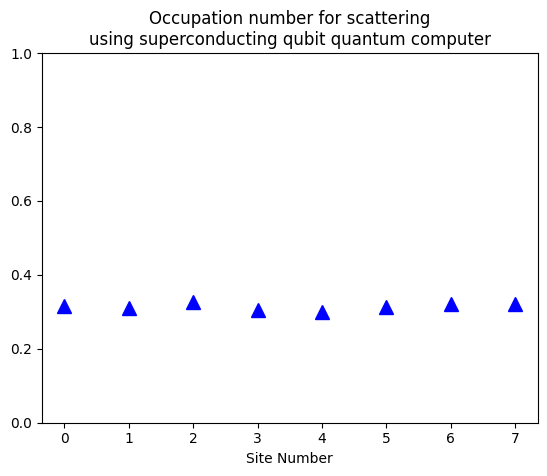

In [ ]:
# ===================================
# Optional display
# ===================================
import matplotlib.pyplot as plt
#plt.bar(range(n_qubits), probs) this is for plotting bars (in the paper are used for representing the exact diagonalization case)

plt.plot(range(len(prob_qubits)), prob_qubits,
         '^',          
         color='blue', 
         markersize=10 
)
plt.ylim(0, 1)
plt.xlabel("Site Number")
plt.title("Occupation number for scattering\nusing superconducting qubit quantum computer", fontsize=12)

plt.show()

Resultados guardados en Fig9b)_(F1)_ibm_torino.json


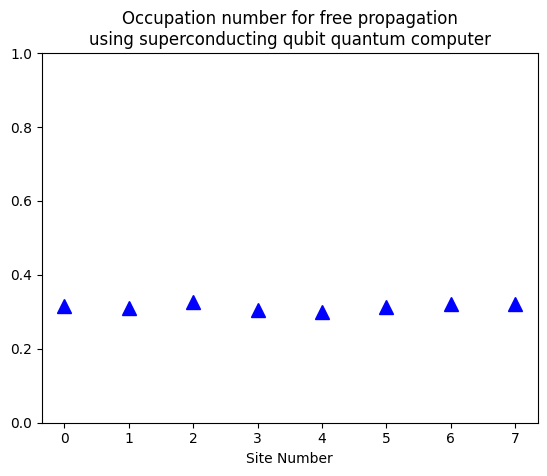

Histograma guardado en Fig9b)_(F1)_ibm_torino.png


In [ ]:
# ==============================
# Save results in JSON
# ==============================

import os
import json

save_path = r"C:\Users\pablo\OneDrive\Escritorio\Universidad\TFG\Fig9_ibm_torino\Fig9b)_ibm_torino"
os.makedirs(save_path, exist_ok=True)

results_dict = {
    "counts": counts_real,
    "shots": shots,
    "prob_qubits": prob_qubits
}

label = "F1"
filename_json = f"Fig9b)_({label})_ibm_torino.json"
filename_png  = f"Fig9b)_({label})_ibm_torino.png"

with open(os.path.join(save_path, filename_json), "w") as f:
    json.dump(results_dict, f, indent=4)

print(f"Results saved in {filename_json}")

# ==============================
#  Save the histogram
# ==============================
plt.plot(range(len(prob_qubits)), prob_qubits,
         '^', color='blue', markersize=10)
plt.ylim(0, 1)
plt.xlabel("Site Number")
plt.title("Occupation number for free propagation\nusing superconducting qubit quantum computer", fontsize=12)


plt.savefig(os.path.join(save_path, filename_png), dpi=300)
plt.show()

print(f"Histogram saved in {filename_png}")